In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns

In [2]:
salary = pd.read_csv("C:/Users/Anusha/Desktop/ExcelRProjects/dataset/SalaryData_Train.csv")

In [3]:
salary.head(5)

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


### Perform Initial EDA

In [4]:
salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


###### No null values existing

In [5]:
salary[salary.duplicated()]

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
326,33,Private,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
364,27,Private,Bachelors,13,Never-married,Craft-repair,Not-in-family,White,Male,0,0,50,United-States,<=50K
518,24,Private,HS-grad,9,Never-married,Handlers-cleaners,Unmarried,Black,Female,0,0,40,United-States,<=50K
525,24,Private,HS-grad,9,Never-married,Craft-repair,Own-child,White,Male,0,0,40,United-States,<=50K
619,33,Private,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30110,47,Private,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
30118,20,Private,HS-grad,9,Never-married,Machine-op-inspct,Own-child,White,Male,0,0,40,United-States,<=50K
30132,22,Private,Some-college,10,Never-married,Adm-clerical,Own-child,White,Male,0,0,40,United-States,<=50K
30157,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K


In [6]:
### Drop duplicate values
salary=salary.drop_duplicates()

In [7]:
salary[salary.duplicated()]

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary


### Visualizations

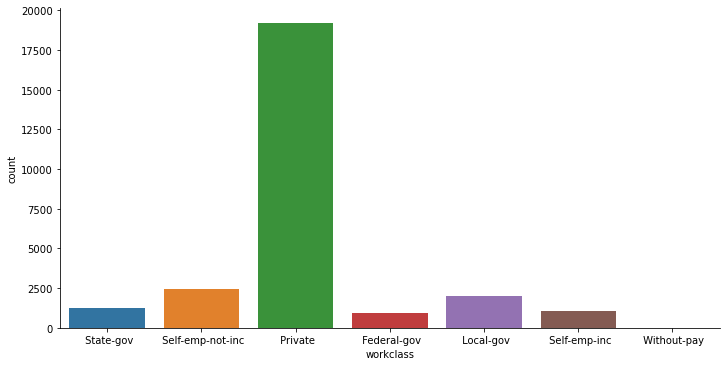

In [8]:
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings("ignore")
sns.factorplot('workclass', data=salary, kind="count",size = 5,aspect = 2)

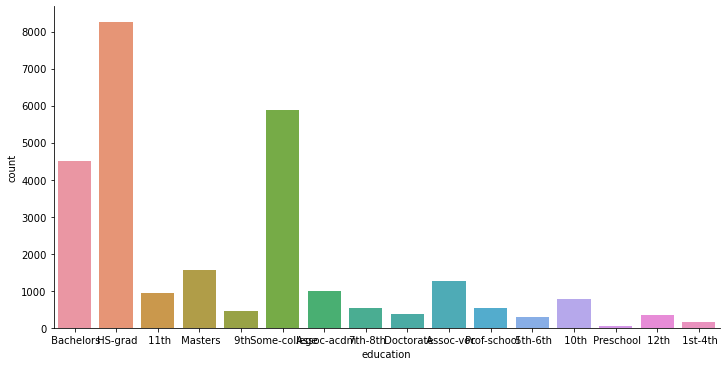

In [9]:
sns.factorplot('education', data=salary, kind="count",size = 5,aspect = 2)

<AxesSubplot:xlabel='education', ylabel='workclass'>

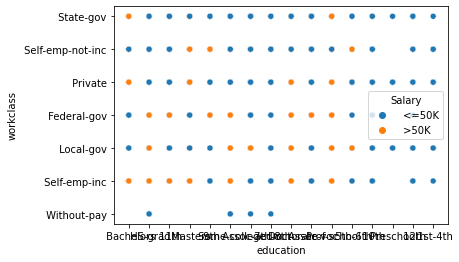

In [10]:
sns.scatterplot(salary['education'],salary['workclass'],hue=salary['Salary'])

In [11]:
salary.Salary.unique()

array([' <=50K', ' >50K'], dtype=object)

In [12]:
##As, the model cannot be applied directly on object data we need to encode this object variables
def encode_labels(dataset):
    from sklearn import preprocessing 
    le = preprocessing.LabelEncoder()
    for column_name in dataset.columns:
        if dataset[column_name].dtype == object:
            dataset[column_name] = le.fit_transform(dataset[column_name])
        else:
            pass

In [13]:
encode_labels(salary)

In [14]:
salary.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,5,9,13,4,0,1,4,1,2174,0,40,37,0
1,50,4,9,13,2,3,0,4,1,0,0,13,37,0
2,38,2,11,9,0,5,1,4,1,0,0,40,37,0
3,53,2,1,7,2,5,0,2,1,0,0,40,37,0
4,28,2,9,13,2,9,5,2,0,0,0,40,4,0


In [15]:
### drop educationno variable as education is already existing
salary.drop(["educationno"],axis=1,inplace =True)

<AxesSubplot:>

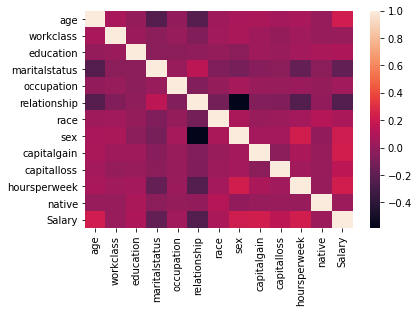

In [16]:
cor = salary.corr()
sns.heatmap(cor)

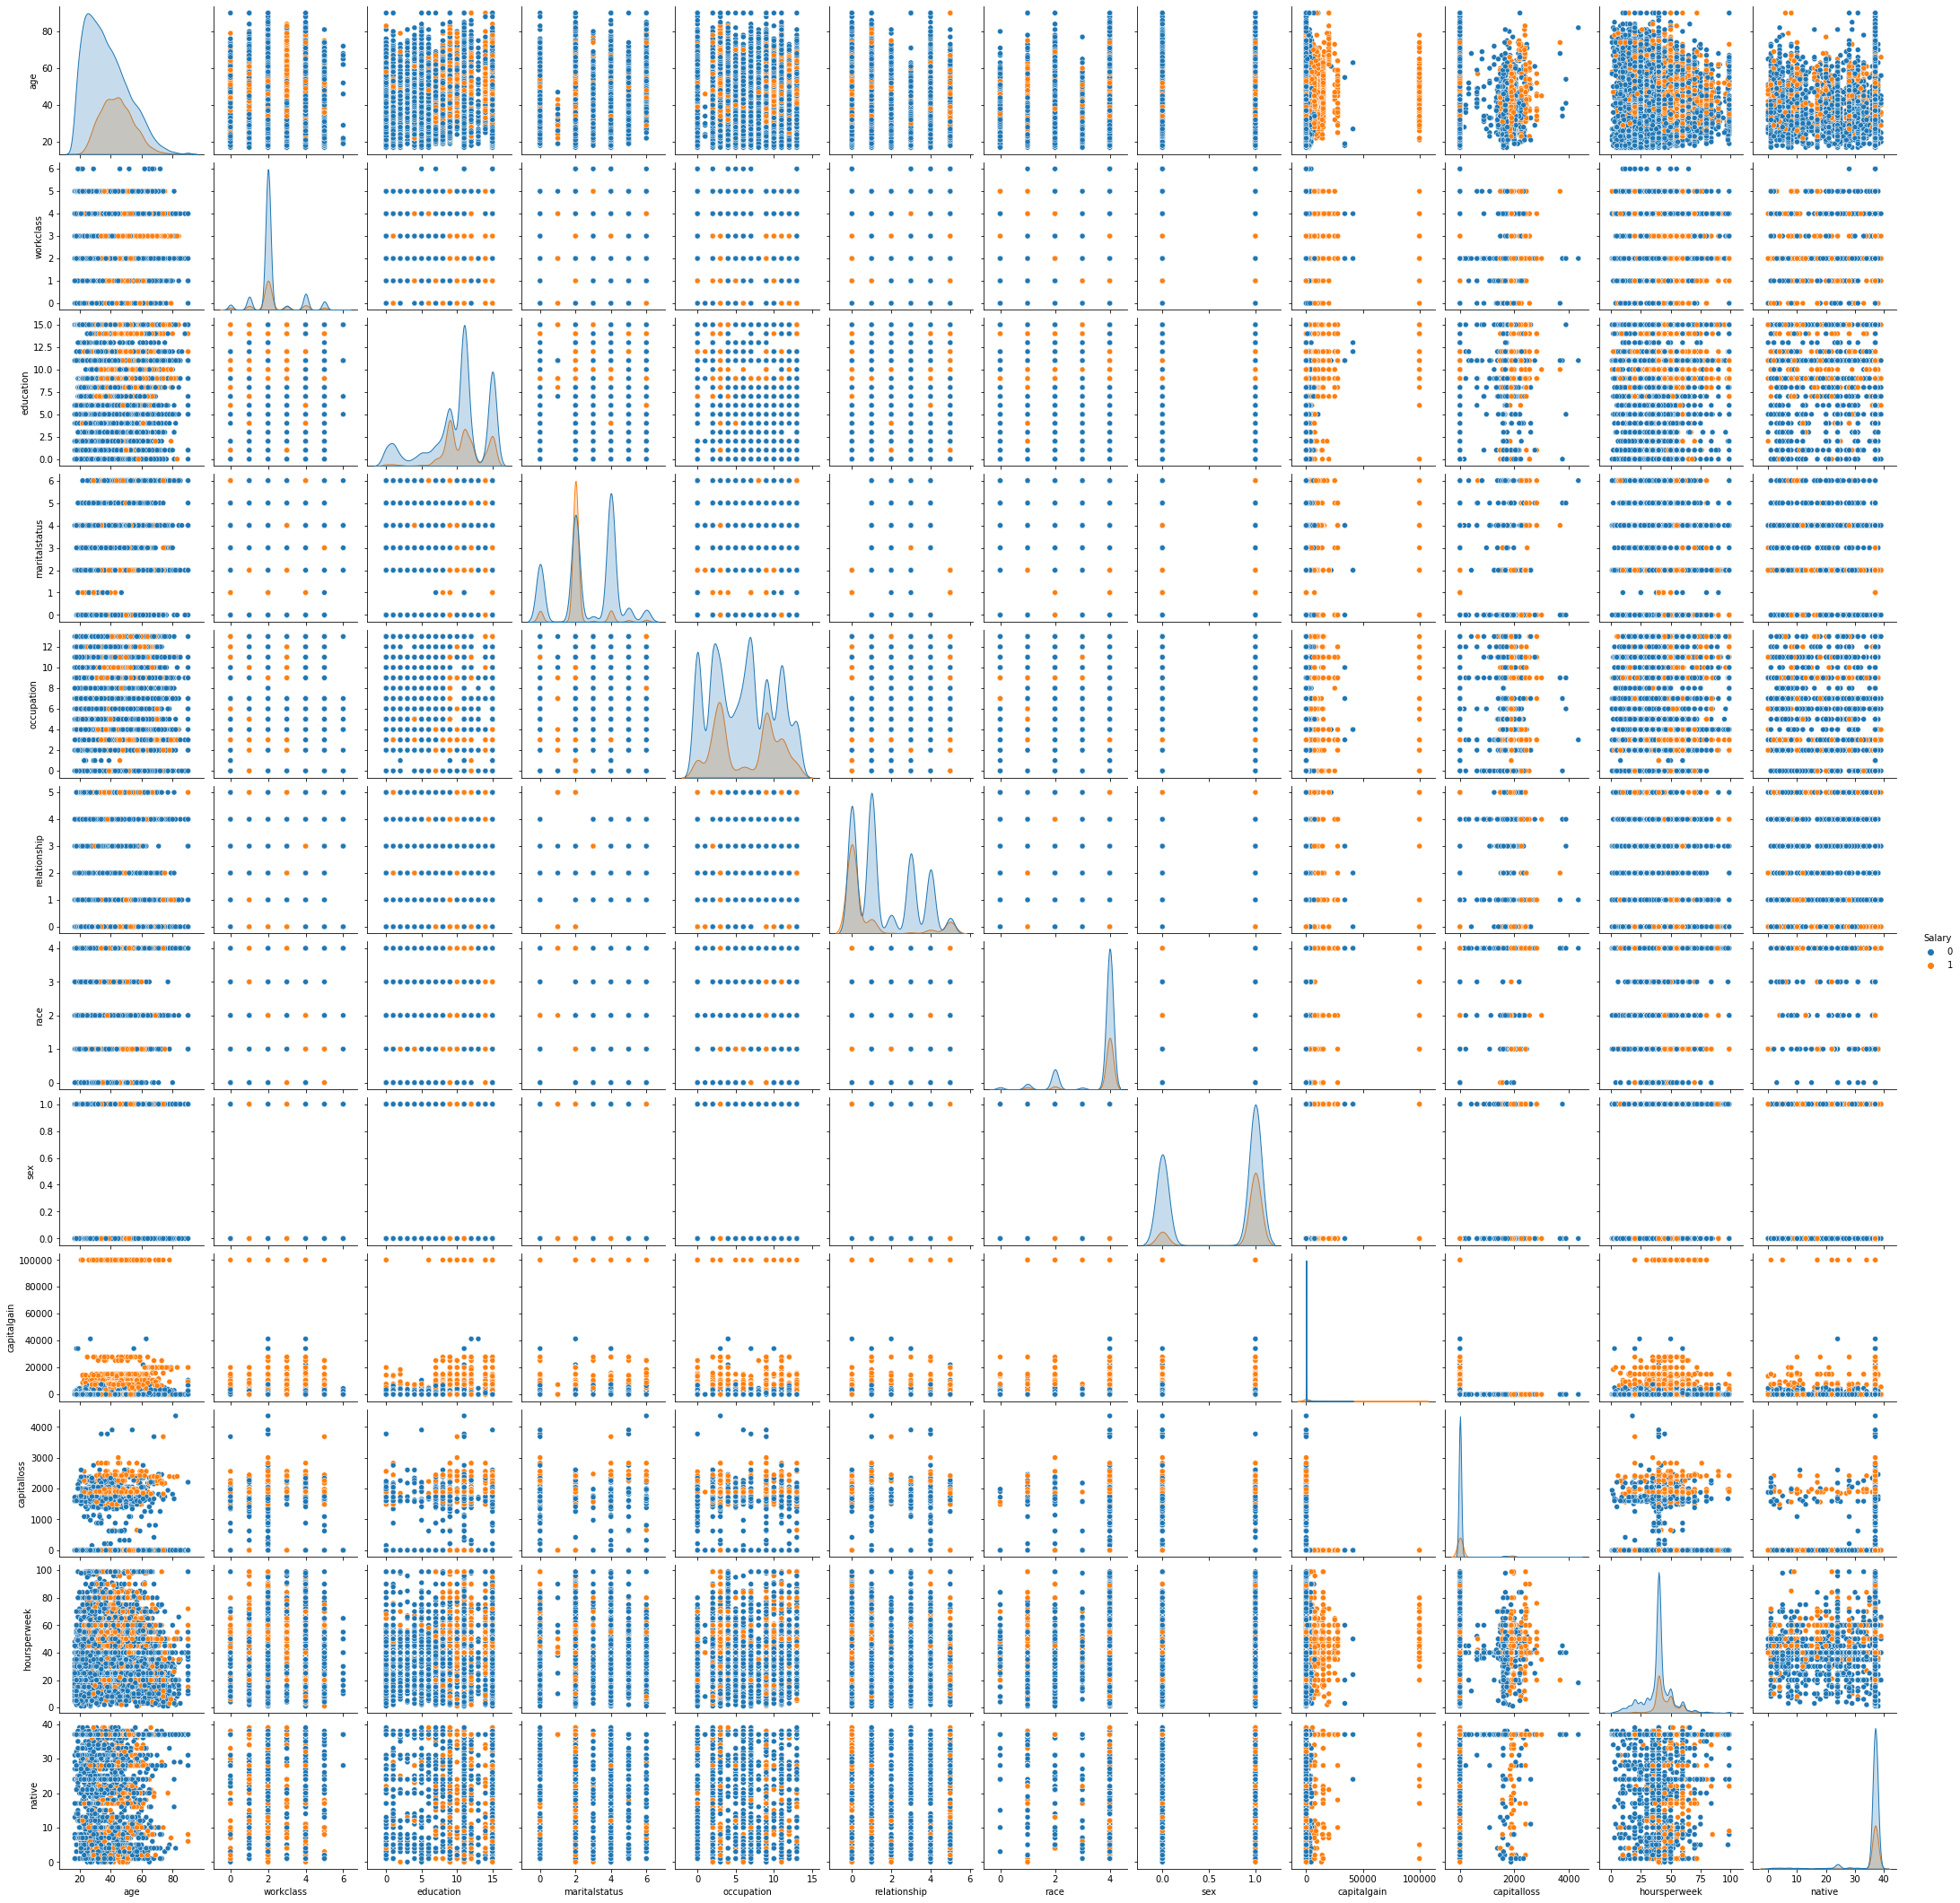

In [37]:
#pairwise plot of all the features
import warnings 
warnings.filterwarnings("ignore")
sns.pairplot(salary,hue='Salary')
plt.show()

<AxesSubplot:xlabel='education'>

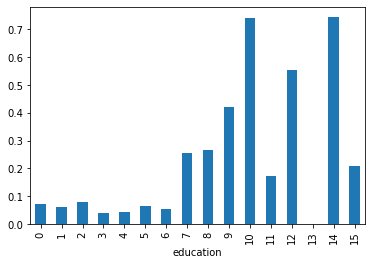

In [18]:
salary.groupby('education').Salary.mean().plot(kind='bar')

<AxesSubplot:xlabel='occupation'>

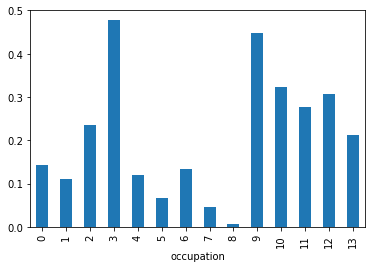

In [19]:
salary.groupby('occupation').Salary.mean().plot(kind='bar')

###### From the visualizations we can conclude that higher the education and the higher the job title, the higher is the income

### Feature Scaling

###### Normalising the data as there is scale difference

In [20]:
predictors = salary.iloc[:,0:12]
target = salary.iloc[:,12]

In [21]:
def norm_func(i):
    x= (i-i.min())/(i.max()-i.min())
    return (x)

In [22]:
### We should normalize Input variables 
salary_train=norm_func(predictors)
salary_train

,age,workclass,education,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native
0,0.301370,0.833333,0.600000,0.666667,0.000000,0.2,1.0,1.0,0.021740,0.0,0.397959,0.948718
1,0.452055,0.666667,0.600000,0.333333,0.230769,0.0,1.0,1.0,0.000000,0.0,0.122449,0.948718
2,0.287671,0.333333,0.733333,0.000000,0.384615,0.2,1.0,1.0,0.000000,0.0,0.397959,0.948718
3,0.493151,0.333333,0.066667,0.333333,0.384615,0.0,0.5,1.0,0.000000,0.0,0.397959,0.948718
4,0.150685,0.333333,0.600000,0.333333,0.692308,1.0,0.5,0.0,0.000000,0.0,0.397959,0.102564
...,...,...,...,...,...,...,...,...,...,...,...,...
30154,0.493151,0.333333,0.800000,0.333333,0.230769,0.0,1.0,1.0,0.000000,0.0,0.397959,0.948718
30155,0.068493,0.333333,1.000000,0.666667,0.769231,0.2,1.0,1.0,0.000000,0.0,0.397959,0.948718
30156,0.136986,0.333333,0.466667,0.333333,0.923077,1.0,1.0,0.0,0.000000,0.0,0.377551,0.948718
30158,0.561644,0.333333,0.733333,1.000000,0.000000,0.8,1.0,0.0,0.000000,0.0,0.397959,0.948718


In [23]:
x_train = salary_train.values
y_train = target.values

In [24]:
salary_test = pd.read_csv("C:/Users/Anusha/Desktop/ExcelRProjects/dataset/SalaryData_Test.csv")

In [25]:
salary_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15060 entries, 0 to 15059
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            15060 non-null  int64 
 1   workclass      15060 non-null  object
 2   education      15060 non-null  object
 3   educationno    15060 non-null  int64 
 4   maritalstatus  15060 non-null  object
 5   occupation     15060 non-null  object
 6   relationship   15060 non-null  object
 7   race           15060 non-null  object
 8   sex            15060 non-null  object
 9   capitalgain    15060 non-null  int64 
 10  capitalloss    15060 non-null  int64 
 11  hoursperweek   15060 non-null  int64 
 12  native         15060 non-null  object
 13  Salary         15060 non-null  object
dtypes: int64(5), object(9)
memory usage: 1.6+ MB


In [26]:
encode_labels(salary_test)

In [27]:
### drop educationno variable as education is already existing
salary_test.drop(["educationno"],axis=1,inplace =True)

In [28]:
predictors_test = salary_test.iloc[:,0:12]
target_test = salary_test.iloc[:,12]

In [29]:
### We should normalize Input variables 
salary_test=norm_func(predictors_test)
salary_test

,age,workclass,education,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native
0,0.109589,0.333333,0.066667,0.666667,0.461538,0.6,0.50,1.0,0.000000,0.0,0.397959,0.948718
1,0.287671,0.333333,0.733333,0.333333,0.307692,0.0,1.00,1.0,0.000000,0.0,0.500000,0.948718
2,0.150685,0.166667,0.466667,0.333333,0.769231,0.0,1.00,1.0,0.000000,0.0,0.397959,0.948718
3,0.369863,0.333333,1.000000,0.333333,0.461538,0.0,0.50,1.0,0.076881,0.0,0.397959,0.948718
4,0.232877,0.333333,0.000000,0.666667,0.538462,0.2,1.00,1.0,0.000000,0.0,0.295918,0.948718
...,...,...,...,...,...,...,...,...,...,...,...,...
15055,0.219178,0.333333,0.600000,0.666667,0.692308,0.6,1.00,1.0,0.000000,0.0,0.397959,0.948718
15056,0.301370,0.333333,0.600000,0.000000,0.692308,0.2,1.00,0.0,0.000000,0.0,0.357143,0.948718
15057,0.287671,0.333333,0.600000,0.333333,0.692308,0.0,1.00,1.0,0.000000,0.0,0.500000,0.948718
15058,0.369863,0.333333,0.600000,0.000000,0.000000,0.6,0.25,1.0,0.054551,0.0,0.397959,0.948718


In [30]:
x_test = salary_test.values
y_test = target_test.values

In [31]:
##### Building the model using Support Vector Machines(SVM)

In [32]:
from sklearn.svm import SVC

In [33]:
## Kernal linear
model_linear = SVC(kernel = "linear")
model_linear.fit(x_train,y_train)

SVC(kernel='linear')

In [34]:
pred_test_linear = model_linear.predict(x_test)

In [35]:
np.mean(pred_test_linear==y_test)

0.7938247011952191

In [36]:
# Kernel = poly
model_poly = SVC(kernel = "poly")
model_poly.fit(x_train,y_train)
pred_test_poly = model_poly.predict(x_test)

In [37]:
np.mean(pred_test_poly==y_test) 

0.8117529880478087

In [38]:
# kernel = rbf
model_rbf = SVC(kernel = "rbf")
model_rbf.fit(x_train,y_train)
pred_test_rbf = model_rbf.predict(x_test)

In [39]:
np.mean(pred_test_rbf==y_test)

0.8158698539176626

In [40]:
#'sigmoid'
model_sig = SVC(kernel = "sigmoid")
model_sig.fit(x_train,y_train)
pred_test_sig = model_rbf.predict(x_test)

In [41]:
np.mean(pred_test_sig==y_test)

0.8158698539176626

### from the above models we can conclude model with kernal = rbf  and kernal = sigmoid are  giving  same and best accuracy

###### Conclusion: It can be considered as a good model for predicting forest fires as the model accuracy is greater than 80% , for more accuracy we can perform other models like decision trees,random forest etc